In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [110]:
import math
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [21]:
cd "~/dropbox"

/Users/agrimabahl/Dropbox


In [22]:
training = scipy.io.loadmat('train.mat')

In [23]:
test=scipy.io.loadmat('test.mat')

In [24]:
newt=training["train_images"]

In [25]:
newt=newt.transpose()

In [42]:
train_matrix=np.empty((60000,28,28))
for i in range(0,28):
    for j in range(0,28):
        for k in range(0,60000):
            train_matrix[k][j][i]=newt[k][i][j]

In [47]:
Ytrain=training["train_labels"]



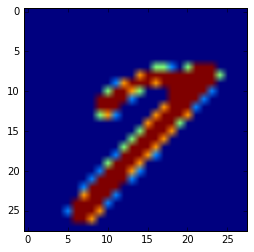

In [43]:
plt.imshow(train_matrix[45050])

In [44]:
train_before=train_matrix.reshape(60000,784)



In [45]:
train_matrix=train_before/255.0

In [46]:
train_matrix=np.insert(train_matrix, 784, values=1, axis=1)

In [48]:
Ymatrix=np.zeros((len(Ytrain),10))

In [49]:
for i in range(len(Ymatrix)):
    Ymatrix[i][int(Ytrain[i])]=1

In [112]:
from sklearn.utils import shuffle
train_matrix, Ymatrix = shuffle(train_matrix, Ymatrix, random_state=0)

In [51]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [52]:
from sklearn.metrics import log_loss

In [267]:
class NeuralNetwork (object):
    def __init__(self):
        self.inpt=785
        self.output=10
        self.hidden=200
        random.seed([2,1])
        self.V=np.random.normal(0,0.01,[self.hidden,self.inpt])
        random.seed([1,2])
        self.W=np.random.normal(0,0.01,[self.output,self.hidden+1])
        
    def forwardprop(self,train,W,V):
        self.p1=train.dot(V.transpose())
        self.xj1=tanh(self.p1)
        self.xj1=np.insert(self.xj1, 200, values=1, axis=1)
        self.p2=self.xj1.dot(W.transpose())
        self.xj2=sigmoid(self.p2)
        return self.xj1,self.xj2
    

    def cross_entropy_loss(self,pred,Ytrain):
        return np.sum(np.nan_to_num(-Ytrain*np.log(pred)-(1-Ytrain)*np.log(1-pred)))    
    
   
    def dLdz2(self,pred,Ytrain):
        y2=[-a+1 for a in Ytrain]
        p2=[-a+1 for a in pred]
        return (-(np.divide(Ytrain,pred)-np.divide(y2,p2)))
            
    
    def backwardprop(self,X,Y,W,V):
        self.h,self.pred=self.forwardprop(X,W,V)
        delta3=np.multiply(self.dLdz2(self.pred,Y),self.pred*(1-self.pred))
        dLdW=np.dot(self.h.transpose(),delta3)
        delta2=np.dot(delta3,self.W)*(1-self.h**2)
        dLdV=np.dot(X.transpose(),delta2)
        return dLdW,dLdV
    #def backward(self,Xtrain,Ytrain):
    
    def trainer(self,X,Y):
        Wi=self.W
        Vi=self.V
        return self.stochgradient(X,Y,Wi,Vi)
    
    def stochgradient(self,X,Y,W,V):
        eps = 0.00002
        xj1,pred=self.forwardprop(X,W,V)
        dLdW,dLdV=self.backwardprop(X,Y,W,V)
        risk_fn=[0]*1000
        for i in range(len(X)):
            print(i)
            xj1,pred=self.forwardprop(X,W,V)
            dLdW,dLdV=self.backwardprop(X,Y,W,V)
            if i%50==0:
                j=int(i/50)
                risk_fn[j]=self.cross_entropy_loss(pred,Y)
                print(risk_fn[j])
            W=W-eps*dLdW.transpose()
            V=V-eps*dLdV[:,:200].transpose()
        return W,V,risk_fn
        

In [268]:
new=NeuralNetwork()

In [269]:
xj1,pred=new.forwardprop(train_matrix[:50000],np.random.normal(0,0.01,[10,201]),np.random.normal(0,0.01,[200,785]))

In [ ]:
start_time = timeit.default_timer()
w2,v2,r2=new.trainer(train_matrix[:20000],Ymatrix[:20000])
elapsed = timeit.default_timer() - start_time

In [ ]:
xj1,pred=new.forwardprop(train_matrix[50000:],w2,v2)

In [ ]:
pred_tuple=[0]*len(pred)

In [ ]:
for i in range(len(pred)):
    pred_tuple[i]=np.argmax(pred[i])

In [96]:
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate,indices

In [ ]:
y=np.zeros(10000)

In [193]:
for i in range(len(Ymatrix[50000:])):
    y[i]=np.argmax(Ymatrix[50000+i])

In [263]:
benchmark(np.array(pred_tuple),np.array(y))

(0.054899999999999997,
 (array([   0,   14,   29,   31,   38,   55,   61,  112,  117,  135,  146,
          168,  189,  204,  213,  219,  254,  260,  262,  279,  303,  307,
          345,  348,  357,  364,  382,  407,  415,  421,  521,  565,  579,
          594,  637,  640,  649,  659,  686,  698,  721,  733,  746,  774,
          818,  819,  834,  838,  840,  847,  849,  855,  917,  922,  970,
         1002, 1030, 1031, 1038, 1041, 1043, 1056, 1065, 1087, 1088, 1090,
         1110, 1127, 1142, 1144, 1150, 1163, 1180, 1280, 1308, 1376, 1384,
         1387, 1390, 1397, 1405, 1420, 1424, 1448, 1466, 1468, 1479, 1481,
         1493, 1512, 1560, 1571, 1573, 1611, 1623, 1629, 1645, 1694, 1702,
         1735, 1760, 1770, 1801, 1805, 1817, 1825, 1836, 1842, 1846, 1854,
         1882, 1887, 1924, 1933, 1936, 1940, 1955, 1958, 1960, 1986, 2025,
         2064, 2078, 2079, 2090, 2115, 2147, 2165, 2168, 2172, 2204, 2215,
         2226, 2228, 2247, 2249, 2313, 2385, 2390, 2392, 2394, 2395, 2425,
  

In [98]:
error 100:0.44109999999999999
    200: 0.28210000000000002
        500:0.21829999999999999
            1000:0.1711
                2000:0.1545
                    5000:0.1014
                        10000:0.054899999999999997
                            20000:
                                50000:

SyntaxError: invalid syntax (<ipython-input-98-e004515dde50>, line 1)

In [ ]:
x=range(1,50000,125)

plt.plot(x,risk_fn)
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('Loss function', fontsize=16)

In [ ]:
20000/50


400.0